In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('/kaggle/input/oooooo/reviews_sentiments.csv')
df =data


Số lần đề cập Tính năng:
Counter({'download': 2680, 'save': 320, 'store': 190, 'customize': 20, 'artistry': 10})


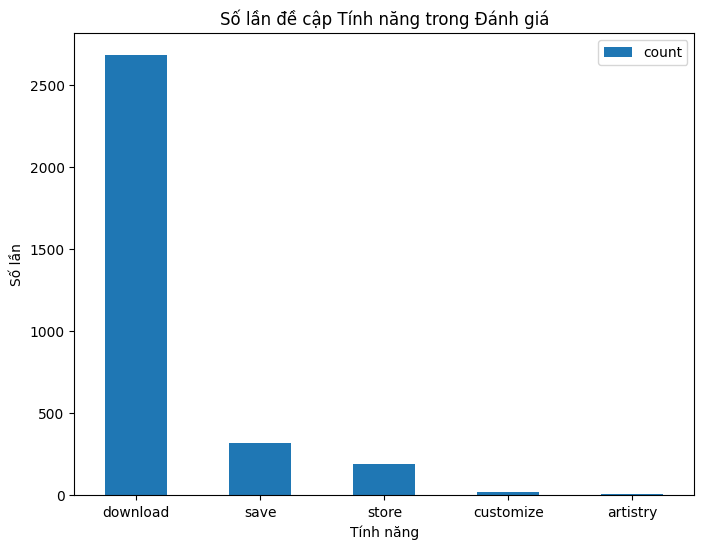

In [17]:
# Các từ khóa liên quan đến tính năng
keywords = ['store', 'save', 'download', 'artistry', 'customize', 'sync']

def extract_features(review):
    if isinstance(review, str):  # Chỉ xử lý nếu review là chuỗi
        review = review.lower()
        return [keyword for keyword in keywords if keyword in review]
    return []  # Trả về danh sách rỗng nếu review không phải là chuỗi

# Áp dụng hàm vào cột 'content'
df['mentioned_features'] = df['content'].apply(extract_features)

# Đếm số lần đề cập mỗi tính năng
from collections import Counter
feature_counts = Counter([feature for features in df['mentioned_features'] for feature in features])
print("Số lần đề cập Tính năng:")
print(feature_counts)

# Vẽ biểu đồ với các nhãn nằm ngang
features_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
features_df.sort_values('count', ascending=False).plot(kind='bar', figsize=(8,6), rot=0)
plt.title('Số lần đề cập Tính năng trong Đánh giá')
plt.xlabel('Tính năng')
plt.ylabel('Số lần')
plt.show()


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Tải stopwords nếu chưa có
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Hàm để tiền xử lý văn bản
def preprocess_text(text):
    if isinstance(text, str):  # Kiểm tra nếu text là chuỗi
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = word_tokenize(text)
        words = [word for word in words if word not in stop_words]
        return words
    return []  # Trả về danh sách rỗng nếu text không phải là chuỗi

# Thêm cột 'processed_content' vào DataFrame
df['processed_content'] = df['content'].apply(preprocess_text)

# Tính tần suất từ cho mỗi sentiment
from collections import Counter

positive_words = df[df['sentiment_label'] == 'POSITIVE']['processed_content'].sum()
negative_words = df[df['sentiment_label'] == 'NEGATIVE']['processed_content'].sum()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Lấy danh sách từ phổ biến nhất trong cả hai sentiment
common_words = set([word for word, freq in positive_word_counts.most_common(20)] + 
                   [word for word, freq in negative_word_counts.most_common(20)])

# Tạo DataFrame chứa tần suất từ
word_freq_df = pd.DataFrame({'word': list(common_words)})
word_freq_df['positive'] = word_freq_df['word'].apply(lambda x: positive_word_counts.get(x, 0))
word_freq_df['negative'] = word_freq_df['word'].apply(lambda x: negative_word_counts.get(x, 0))

# Tạo cột 'total' để sắp xếp
word_freq_df['total'] = word_freq_df['positive'] + word_freq_df['negative']

# Sắp xếp DataFrame
word_freq_df = word_freq_df.sort_values('total', ascending=False)

# Tạo ma trận cho Heatmap
heatmap_data = word_freq_df.set_index('word')[['positive', 'negative']]

# Vẽ Heatmap với các từ khóa nằm ngang
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap Tần suất Từ theo Sentiment')
plt.xlabel('Từ')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c4649d07340>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [11]:
df['sentiment_label'] = df['sentiment']

In [18]:
# Cài đặt plotly
import plotly.express as px

# Giả sử bạn có cột 'country' chứa mã quốc gia (ISO alpha-3 code)
# Tính số lượng đánh giá và điểm số trung bình theo quốc gia
country_stats = df.groupby('country').agg({'score': 'mean', 'content': 'count'}).reset_index()
country_stats.columns = ['country', 'average_score', 'review_count']

# Vẽ Geo Map
fig = px.choropleth(country_stats, locations='country',
                    color='average_score',
                    hover_name='country',
                    hover_data=['review_count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Điểm số Đánh giá Trung bình theo Quốc gia')
fig.show()


In [23]:
# Cài đặt thư viện plotly nếu chưa có
!pip install plotly

import pandas as pd
import plotly.graph_objects as go

# Tính toán số lượng cho mỗi kết hợp giữa score và sentiment_label
score_sentiment_counts = df.groupby(['score', 'sentiment_label']).size().reset_index(name='count')

# Tạo danh sách các labels cho Sankey diagram
labels = list(df['score'].unique()) + list(df['sentiment_label'].unique())

# Tạo dictionary để ánh xạ labels với chỉ số
label_indices = {label: i for i, label in enumerate(labels)}

# Tạo các nguồn (source), đích (target), và giá trị (value) cho các luồng
sources = score_sentiment_counts['score'].map(label_indices).tolist()
targets = score_sentiment_counts['sentiment_label'].map(label_indices).tolist()
values = score_sentiment_counts['count'].tolist()

# Điều chỉnh chỉ số của targets
targets = [t for t in targets]

# Tạo biểu đồ Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    ))])

fig.update_layout(title_text="Biểu đồ Sankey: Luồng Sentiment theo Điểm số Đánh giá", font_size=12)
fig.show()


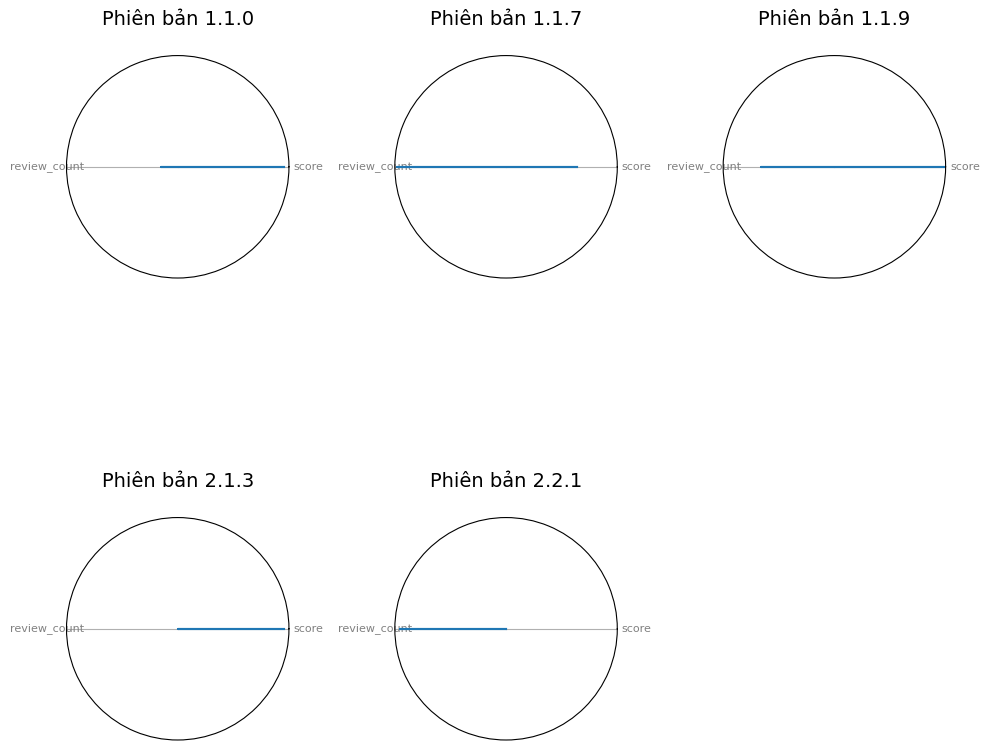

In [22]:
# Chọn các phiên bản ứng dụng phổ biến nhất
top_versions = df['appVersion'].value_counts().nlargest(5).index

# Tạo DataFrame chứa thông tin cần thiết
version_stats = df[df['appVersion'].isin(top_versions)].groupby('appVersion').agg({
    'score': 'mean',
    'score': 'mean',
    'content': 'count'
}).rename(columns={'content': 'review_count'})

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stats_scaled = scaler.fit_transform(version_stats)
stats_scaled = pd.DataFrame(stats_scaled, index=version_stats.index, columns=version_stats.columns)

# Vẽ biểu đồ Radar
import matplotlib.pyplot as plt
import numpy as np

categories = list(stats_scaled.columns)
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))

for idx, version in enumerate(stats_scaled.index):
    values = stats_scaled.loc[version].tolist()
    values += values[:1]
    plt.subplot(2, 3, idx+1, polar=True)
    plt.title(f'Phiên bản {version}', size=14, y=1.1)
    plt.polar(angles, values)
    plt.fill(angles, values, alpha=0.25)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([], [])

plt.tight_layout()
plt.show()


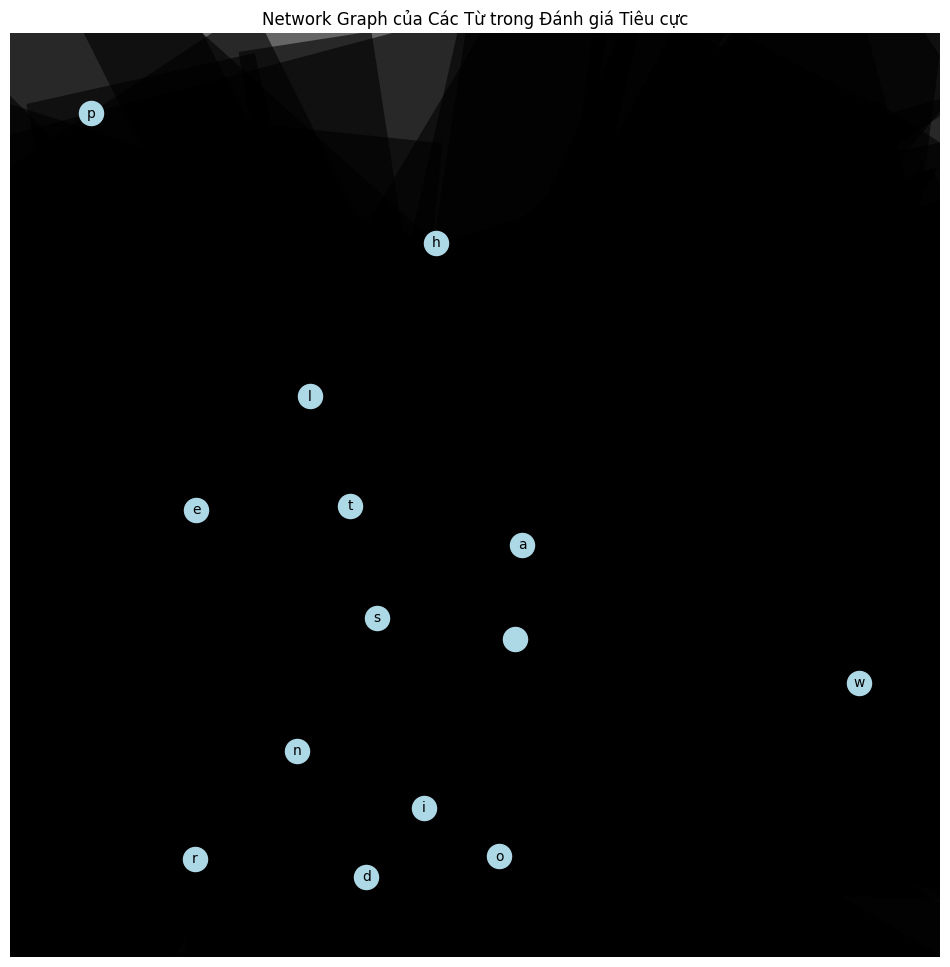

In [13]:
# Lấy các đánh giá tiêu cực
negative_reviews = df[df['sentiment_label'] == 'NEGATIVE']['content']

# Tạo danh sách các cặp từ xuất hiện cùng nhau
from itertools import combinations
from collections import Counter

# Tạo danh sách các cặp từ
pair_counts = Counter()

for review in negative_reviews:
    for pair in combinations(set(review), 2):
        pair_counts[pair] += 1

# Chọn các cặp từ xuất hiện nhiều nhất
common_pairs = pair_counts.most_common(50)

# Chuẩn bị dữ liệu cho Network Graph
import networkx as nx

G = nx.Graph()

for pair, weight in common_pairs:
    G.add_edge(pair[0], pair[1], weight=weight)

# Vẽ Network Graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[w/5 for w in weights], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Network Graph của Các Từ trong Đánh giá Tiêu cực')
plt.axis('off')
plt.show()


sentiment  NEGATIVE  POSITIVE
country                      
BR         0.139563  0.860437
DE         0.139563  0.860437
ES         0.139563  0.860437
FR         0.139563  0.860437
JP         0.139563  0.860437
PL         0.139563  0.860437
TH         0.139563  0.860437
TW         0.139563  0.860437
US         0.139563  0.860437
VN         0.139563  0.860437


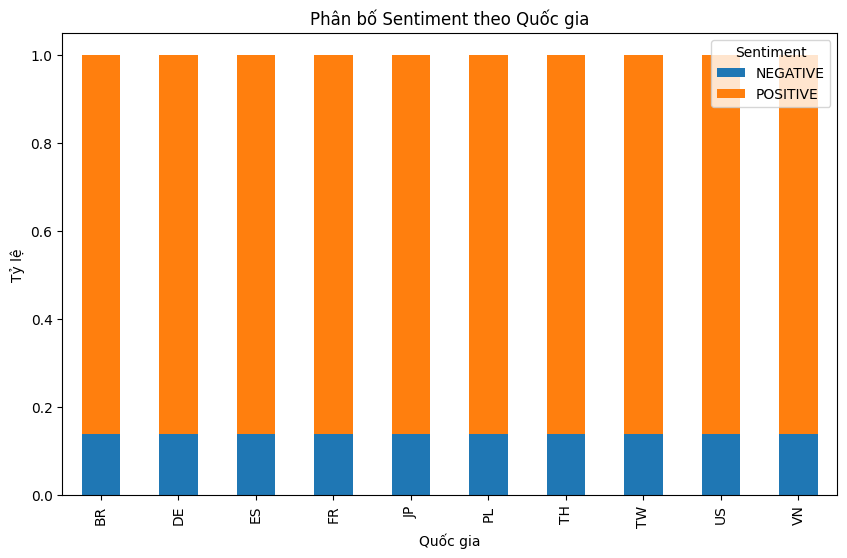

In [8]:
# Phân tích sentiment theo quốc gia
sentiment_by_country = df.groupby('country')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_by_country)

# Vẽ biểu đồ sentiment cho các quốc gia hàng đầu
top_countries = sentiment_by_country.sum(axis=1).sort_values(ascending=False).head(10).index
sentiment_by_country.loc[top_countries].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Phân bố Sentiment theo Quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ')
plt.legend(title='Sentiment')
plt.show()


Sentiment của Đánh giá đề cập đến Quảng cáo:
sentiment
POSITIVE    0.549669
NEGATIVE    0.450331
Name: proportion, dtype: float64
Sentiment Tổng thể:
sentiment
POSITIVE    0.860437
NEGATIVE    0.139563
Name: proportion, dtype: float64


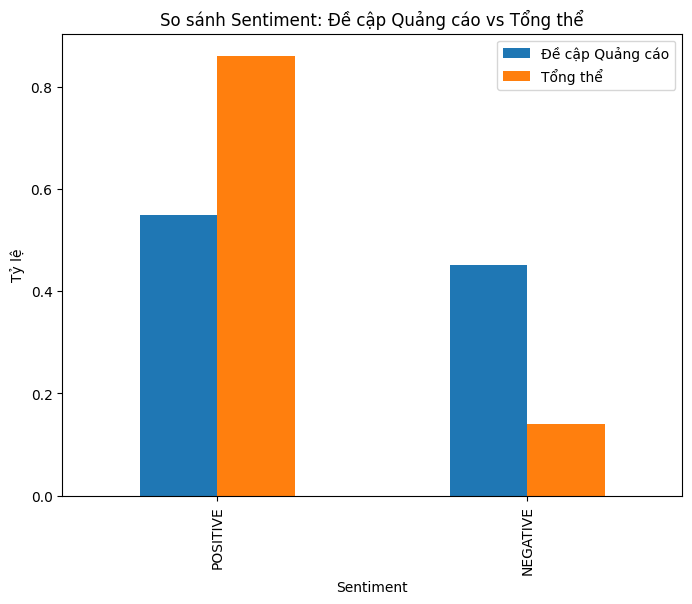

In [27]:
# Xác định đánh giá đề cập đến quảng cáo


# Xác định đánh giá đề cập đến quảng cáo
df['mentions_ads'] = df['content'].str.contains('ad |ads|advert', case=False, regex=True, na=False)

# Sentiment của đánh giá đề cập đến quảng cáo
ads_reviews = df[df['mentions_ads']]
ads_sentiment = ads_reviews['sentiment'].value_counts(normalize=True)
print("Sentiment của Đánh giá đề cập đến Quảng cáo:")
print(ads_sentiment)

# So sánh với sentiment tổng thể
overall_sentiment = df['sentiment'].value_counts(normalize=True)
print("Sentiment Tổng thể:")
print(overall_sentiment)

# Vẽ biểu đồ
ads_vs_overall = pd.DataFrame({
    'Đề cập Quảng cáo': ads_sentiment,
    'Tổng thể': overall_sentiment
}).fillna(0)

ads_vs_overall.plot(kind='bar', figsize=(8,6))
plt.title('So sánh Sentiment: Đề cập Quảng cáo vs Tổng thể')
plt.xlabel('Sentiment')
plt.ylabel('Tỷ lệ')
plt.show()



In [19]:
# Giả sử có cột 'userId' để nhận dạng người dùng
# Với dữ liệu này, sử dụng 'userName' như một đại diện

# Đếm số lượng đánh giá mỗi người dùng
user_review_counts = df['userName'].value_counts()
print(user_review_counts.head())

# Xác định người dùng có nhiều đánh giá
loyal_users = user_review_counts[user_review_counts > 1].index.tolist()
print("Người dùng Trung thành:", loyal_users)

# Phân tích sentiment của người dùng trung thành
loyal_user_reviews = df[df['userName'].isin(loyal_users)]
loyal_user_sentiments = loyal_user_reviews['sentiment'].value_counts()
print("Sentiment của Người dùng Trung thành:")
print(loyal_user_sentiments)


userName
A Google user     50650
Gavin Dennis         20
Malissa Denton       20
Harley Bean          10
William Vachon       10
Name: count, dtype: int64
Người dùng Trung thành: ['A Google user', 'Gavin Dennis', 'Malissa Denton', 'Harley Bean', 'William Vachon', 'Paul Njoka', 'Priyanka Kandari', 'Kitija Lasmane', 'Erfan Naderi', 'Mustafa Kelly', 'Alex Sobotka', 'Arial parker', 'Paula Simpson', 'Francesca Smith', 'Kim McCluskey', 'Emmanuel Sandoval', 'Becky Littlejohn', 'mrhelladsa true hell', 'Jamarius Evans', 'Ekaterina Zelenkova', 'Kelsey Hinote', 'Joshua Kirimi', 'Jonathan Lozier', 'Karen Loch', 'ImAlmostFunny', 'Cosmina 92', "Hainite Ta'ehia", 'Deacon Helms', 'Kayla Sproull', 'Eze Favour', 'Ivanov Khishigdelger', 'Saef Patwary', 'Ayden Furr', 'l_crush5696 mat', 'choumaissa stories', 'Rovonne Adams', 'ProStreak #176', 'Chris Edwards', 'Rajesh S Manyal', 'Darien Cobbs', 'Serina Hok', 'Muhumuza Duncan', 'Mandisa Martin', 'Johnathan Rainwater', 'Brenda Lewis', 'Daniel Ferrari', 'KUMUD

In [24]:
# Chuyển đổi cột 'repliedAt' và 'at' sang kiểu datetime
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# Tính tỷ lệ phản hồi
total_reviews = len(df)
responded_reviews = df['replyContent'].notna().sum()
response_rate = responded_reviews / total_reviews * 100
print(f"Tỷ lệ Phản hồi: {response_rate:.2f}%")

# Phân tích thời gian phản hồi
df['response_time'] = (df['repliedAt'] - df['at']).dt.total_seconds() / 3600  # tính bằng giờ
average_response_time = df['response_time'].mean()
print(f"Thời gian Phản hồi Trung bình: {average_response_time:.2f} giờ")

# So sánh sentiment giữa đánh giá được phản hồi và không được phản hồi
responded_sentiment = df[df['replyContent'].notna()]['sentiment'].value_counts(normalize=True)
non_responded_sentiment = df[df['replyContent'].isna()]['sentiment'].value_counts(normalize=True)
print("Phân bố Sentiment của Đánh giá được Phản hồi:")
print(responded_sentiment)
print("Phân bố Sentiment của Đánh giá không được Phản hồi:")
print(non_responded_sentiment)


Tỷ lệ Phản hồi: 74.56%
Thời gian Phản hồi Trung bình: 83.24 giờ
Phân bố Sentiment của Đánh giá được Phản hồi:
sentiment
POSITIVE    0.866494
NEGATIVE    0.133506
Name: proportion, dtype: float64
Phân bố Sentiment của Đánh giá không được Phản hồi:
sentiment
POSITIVE    0.84269
NEGATIVE    0.15731
Name: proportion, dtype: float64


user_segment
Người dùng Chung        49740
Đam mê Hình nền         16470
Yêu thích Nghệ thuật     1000
Name: count, dtype: int64


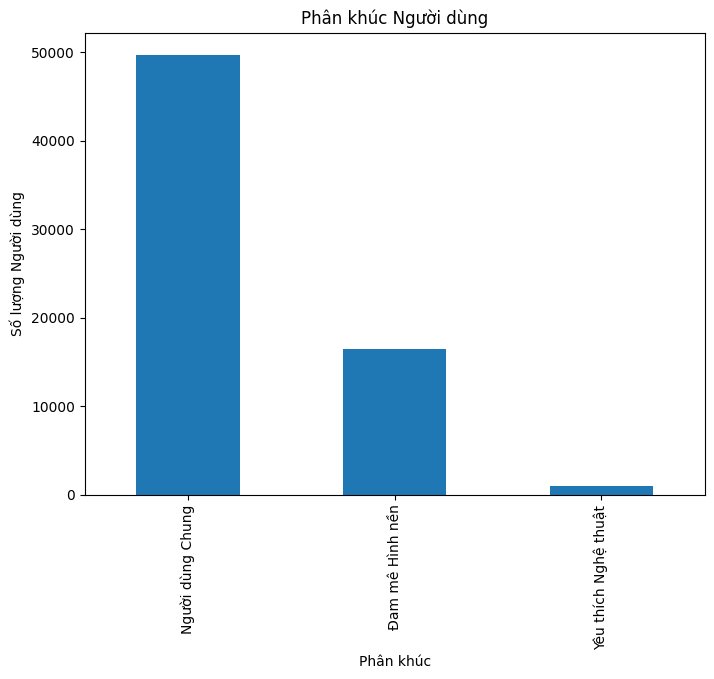

In [22]:
def classify_user(review):
    if isinstance(review, str):  # Chỉ xử lý nếu review là chuỗi
        if 'art' in review.lower() or 'artistry' in review.lower():
            return 'Yêu thích Nghệ thuật'
        elif 'wallpaper' in review.lower():
            return 'Đam mê Hình nền'
    return 'Người dùng Chung'  # Trả về 'Người dùng Chung' nếu review không phải là chuỗi

# Áp dụng hàm vào cột 'content'
df['user_segment'] = df['content'].apply(classify_user)

# Phân tích các phân khúc
segment_counts = df['user_segment'].value_counts()
print(segment_counts)

# Vẽ biểu đồ
segment_counts.plot(kind='bar', figsize=(8,6))
plt.title('Phân khúc Người dùng')
plt.xlabel('Phân khúc')
plt.ylabel('Số lượng Người dùng')
plt.show()


Sentiment của Đánh giá đề cập đến Vấn đề Hiệu suất:
sentiment
POSITIVE    0.5625
NEGATIVE    0.4375
Name: proportion, dtype: float64


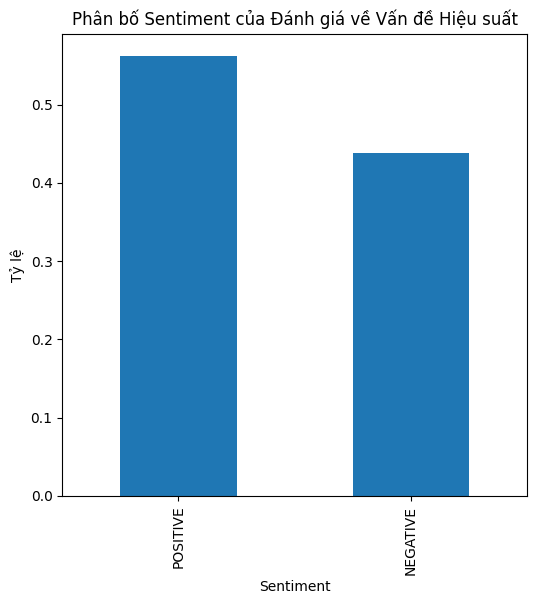

In [34]:
# Xác định đánh giá đề cập đến vấn đề hiệu suất
performance_keywords = ['slow', 'lag', 'crash', 'bug', 'error', 'load']
df['mentions_performance'] = df['content'].str.contains('|'.join(performance_keywords), case=False, regex=True, na=False)

# Phân tích sentiment của các đánh giá này
performance_issues = df[df['mentions_performance']]
performance_sentiment = performance_issues['sentiment'].value_counts(normalize=True)
print("Sentiment của Đánh giá đề cập đến Vấn đề Hiệu suất:")
print(performance_sentiment)

# Vẽ biểu đồ
performance_sentiment.plot(kind='bar', figsize=(6,6))
plt.title('Phân bố Sentiment của Đánh giá về Vấn đề Hiệu suất')
plt.xlabel('Sentiment')
plt.ylabel('Tỷ lệ')
plt.show()
